## Проект по информатике (Набережная Елизавета, Обухова Анастасия, Гуменная Яна)

#  1. Kiva и ее деятельность
***


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задачи
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересуют не статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

#### Составим алгоритм данного исследования:
- Проверим, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомимся с датасетом, изучим его базовые характеристики, выявим первоначальные зависимости.
- Изучим основные демографические характеристики людей, которые используют Kiva. Поймем, из каких они регионов и стран, какова гендерная характеристика заемщиков.
- Посмотрим, для каких целей людям нужны средства и какие суммы они просят. Изучим сектора экономики, виды деятельности и сделаем выводы о том, как обстоят дела в каждом из них.
- Проанализируем, как долго заемщикам приходится ждать полного финансирования заявки.
- Попробуем изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита.
- Сформулируем основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Базы данных компании Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Импорт данных и первое знакомство с датасетом
***
Датасеты:
*  df_mpi
*  df_kiva_loans 


Импортируем необходимые библиотеки и загрузим предоставленные наборы данных:

In [7]:
# Импорт библиотек

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings("ignore")  

In [9]:
df_kiva_loans = pd.read_csv("kiva_loans.csv", parse_dates=['posted_time', 'disbursed_time', 'funded_time'])
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных:

In [10]:
df_mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [11]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе:

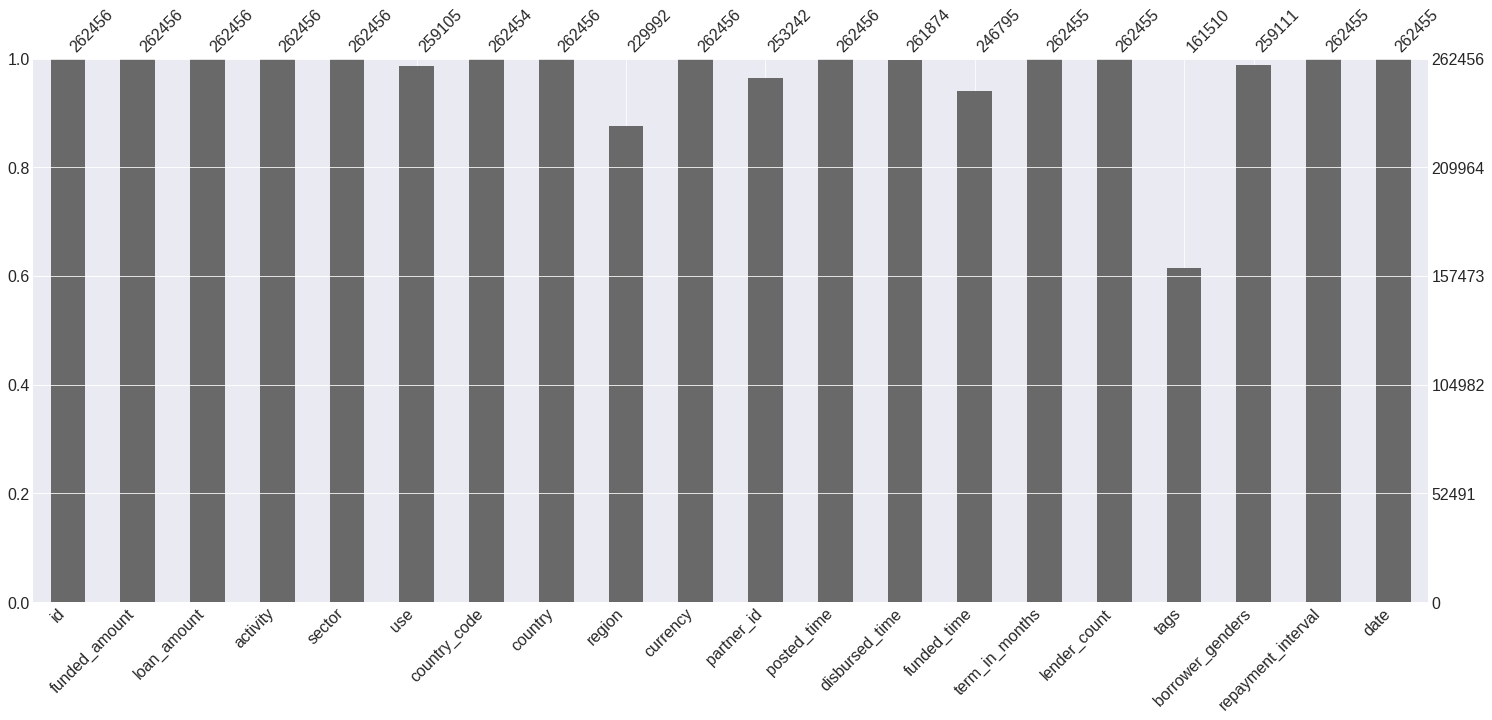

In [12]:
msno.bar(df_kiva_loans)

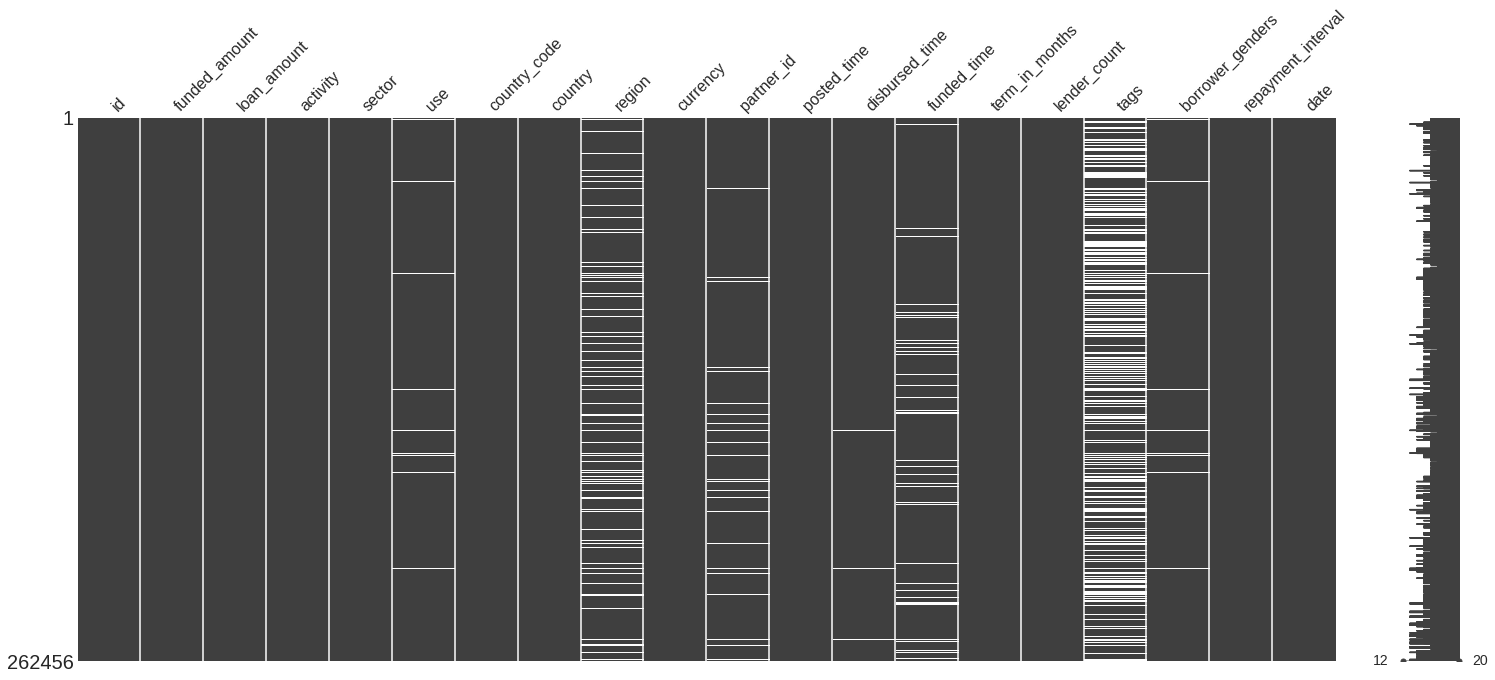

In [13]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [14]:
df_kiva_loans.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                      float64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object

In [15]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,2.624560e+05,262456.000000,262456.000000,253242.000000,262455.000000,262455.000000
mean,7.919656e+05,838.778671,876.797539,161.947323,14.024968,23.339212
std,9.181120e+04,1113.174137,1149.193936,76.058638,9.704604,29.634347
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,7.192418e+05,275.000000,275.000000,123.000000,8.000000,8.000000
50%,7.861275e+05,500.000000,500.000000,145.000000,13.000000,15.000000
75%,8.526132e+05,1000.000000,1000.000000,199.000000,14.000000,28.000000
max,1.124034e+06,100000.000000,100000.000000,455.000000,158.000000,2986.000000


In [16]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval,date
count,262456,262456,259105,262454,262456,229992,262456,161510,259111,262455,262455
unique,158,15,183401,84,85,8012,66,36489,4511,4,545
top,Farming,Agriculture,to purchase more groceries to sell.,PH,Philippines,Lahore,PHP,user_favorite,female,monthly,2014-11-24
freq,26841,70527,941,58759,58759,3375,58759,16699,165379,131421,1044


**Первые очевидные результаты и выводы, которые можно сделать:**
* В этом датасете содержатся данные о **87** странах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только **1298** различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта платформа и какое влияние она оказывает.


# 2.2. Пользователи Kiva

### 2.2.1. Из каких стран эти люди? 
Из исходного файла
***

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.


In [17]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [18]:
countries

Philippines      58759
Kenya            32060
El Salvador      19082
Uganda           10579
Peru             10428
Cambodia          9442
Pakistan          8688
Colombia          8439
Tajikistan        6753
Nicaragua         6626
Ecuador           4503
Mali              4322
Vietnam           4252
Paraguay          4230
Bolivia           3939
India             3512
Nigeria           3418
Honduras          3156
Rwanda            3114
Armenia           3054
Samoa             2937
Kyrgyzstan        2850
Guatemala         2756
Palestine         2672
Sierra Leone      2480
Zimbabwe          2286
Lebanon           2156
Indonesia         2100
United States     2092
Liberia           2088
Tanzania          2067
Yemen             1962
Jordan            1915
Mexico            1816
Togo              1759
Senegal           1635
Ghana             1487
Azerbaijan        1336
Name: country, dtype: int64

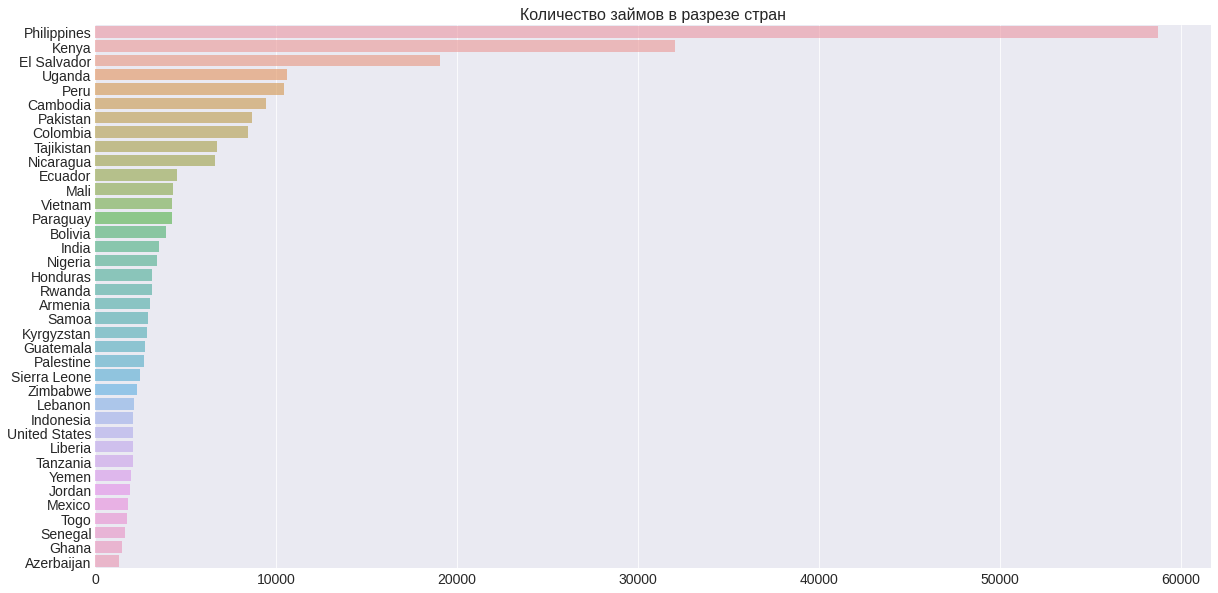

In [19]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины.

Скорее всего, это связано с тем, что там широко распространены краткосрочные и небольшие займы.
Запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Нет ни одной страны Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в США не такой, как в других странах. 

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

In [20]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [21]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [22]:
df_kiva_loans_world_region = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [23]:
regions = df_kiva_loans_world_region['world_region'].value_counts()

In [24]:
regions_list = regions.index.to_list()

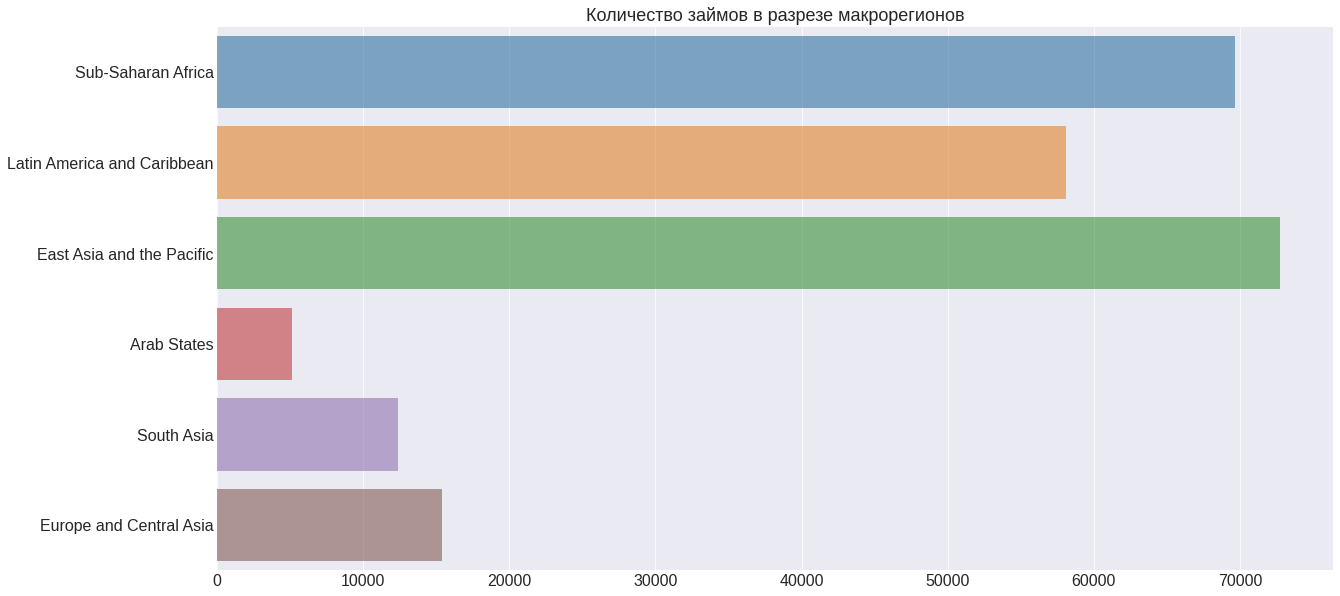

In [25]:
regions_mpi = df_mpi['world_region'].value_counts()
list_regions = list(regions_mpi.index)

plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, order = list_regions,  alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие 3-х лидеров и 3-х отстающих по количеству выданных займов

Исходя из этого, можно предположить, что в 3 регионах-отстающих либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо платфоома Kiva пока не набрала те обороты, что мы видим в 3 регионах-лидерах. Присутствие региона "Арабские страны" свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [26]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                        165379
male                                                                                                                                                                                                                                                           57589
female, female, female                                                                                                                                                                                                                                          3954
female, female                                                                                                                                                                                                           

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме.

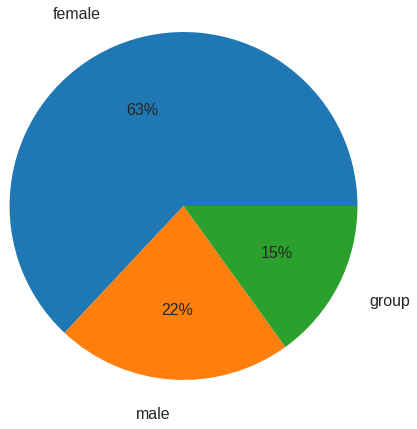

In [27]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков - женщины?**

In [28]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

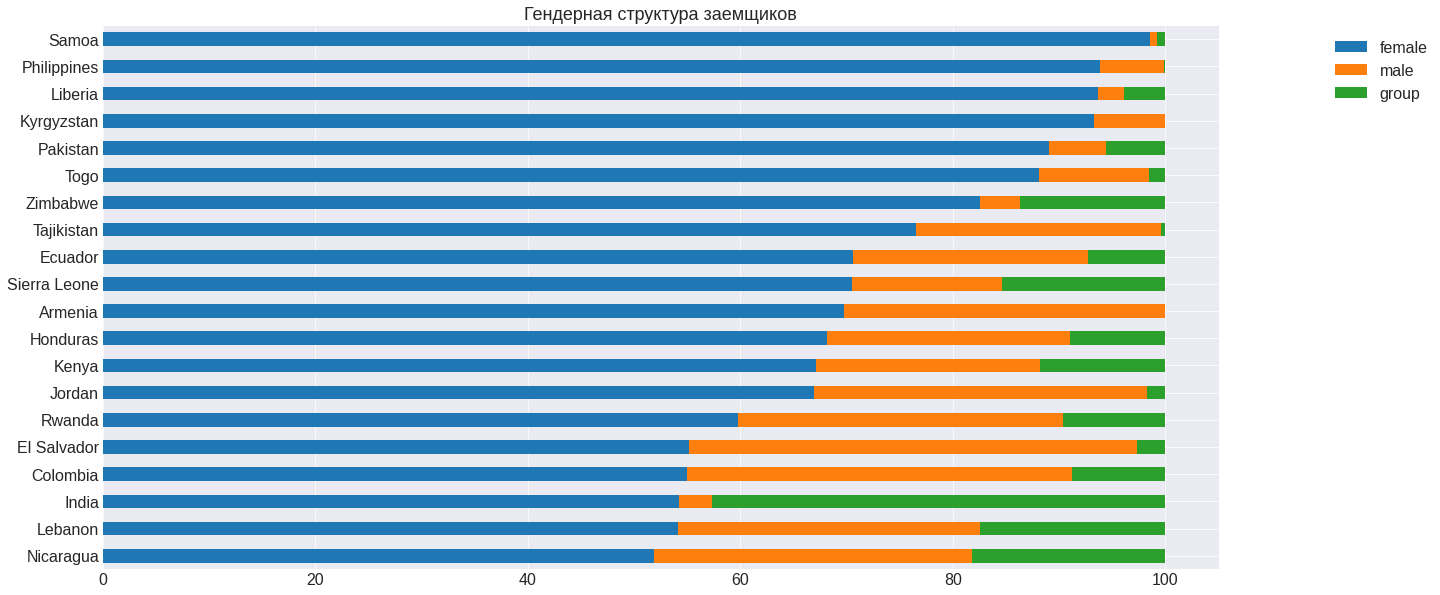

In [29]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заемщиков в разрезе стран?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

**В каких странах подавляющее большинство заемщиков - мужчины?**

In [30]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

df_male = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

   
df_male = df_male[['male', 'female', 'group']]
df_male = df_male[(df_male['male'] >= df_male['female']) & (df_male['male'] >= df_male['group'])]
df_male

borrower_genders,male,female,group
country,,,
Indonesia,43.428571,38.714286,17.857143
Uganda,45.561962,42.726156,11.711882
Azerbaijan,61.152695,38.622754,0.224551
Palestine,71.631737,28.031437,0.336826
Nigeria,79.490930,19.338795,1.170275


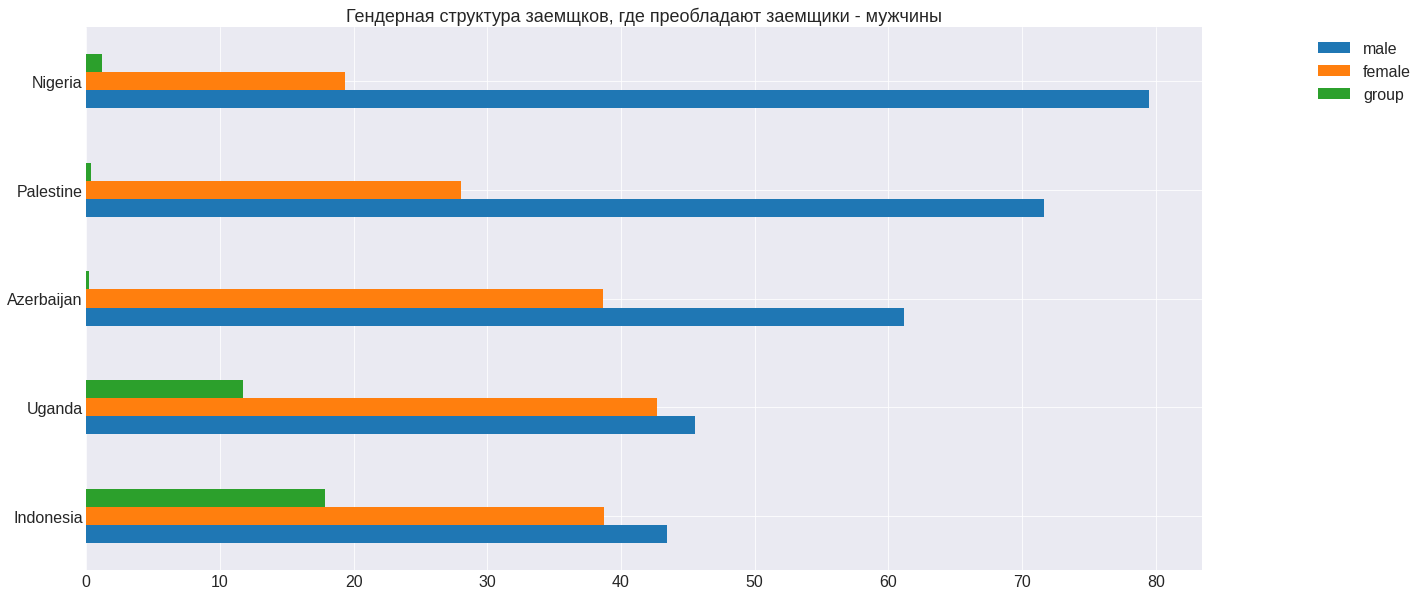

In [31]:
plot = df_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , title='Гендерная структура заемщков, где преобладают заемщики - мужчины'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

  **С чем может быть связана преобладающая доля мужчин в некоторых странах?**

Так как всего представлено 87 стран, 4 страны, с большинством заемщиков мужчин скорее исключениее, чем какая-то закономерность. 

Стоит так же отметить, что весомое преимущество заемщиков мужчин только в 2-х странах: **Нигерии** и **Палестине**.

Такое распределение может быть связано с сильным ущемеление женских прав, в частности решение мужчин о том, что женщина - "хранительница очага".

**В каких странах подавляющее большинство заемщиков - группы?**

In [32]:
df_group = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'female'])

   
df_group = df_group[[ 'group', 'female', 'male']]
df_group = df_group[(df_group['group'] >= df_group['female']) & (df_group['group'] >= df_group['male'])]
df_group

borrower_genders,group,female,male
country,,,
Mexico,34.581498,32.488987,32.929515
Vietnam,47.271872,46.966134,5.761994
Yemen,50.152905,8.970438,40.876656
Paraguay,51.229314,28.179669,20.591017
Guatemala,52.902758,19.666183,27.431060
Cambodia,56.121584,35.606863,8.271553
Senegal,58.409786,19.938838,21.651376
Ghana,69.199731,16.745124,14.055145
Tanzania,75.520077,20.948234,3.531688


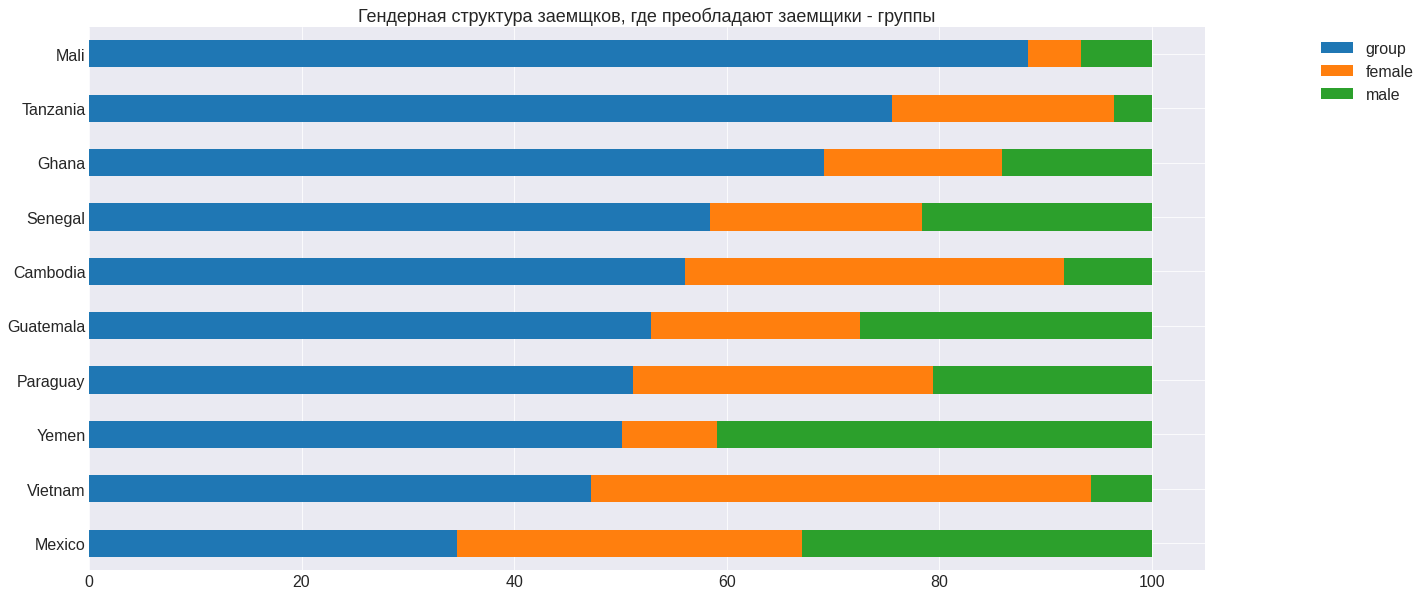

In [33]:
plot = df_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщков, где преобладают заемщики - группы'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [34]:
#посмотрим где находятся страны, чтобы лучше понять закономерности
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

    
df_group_merged = df_group.merge(df_mpi_grouped, on='country', how='left')
df_group_merged

,country,group,female,male,ISO,world_region,MPI
0,Mexico,34.581498,32.488987,32.929515,MEX,Latin America and Caribbean,0.000000
1,Vietnam,47.271872,46.966134,5.761994,NaN,NaN,NaN
2,Yemen,50.152905,8.970438,40.876656,YEM,Arab States,0.225952
3,Paraguay,51.229314,28.179669,20.591017,NaN,NaN,NaN
4,Guatemala,52.902758,19.666183,27.431060,GTM,Latin America and Caribbean,0.113957
5,Cambodia,56.121584,35.606863,8.271553,KHM,East Asia and the Pacific,0.164053
6,Senegal,58.409786,19.938838,21.651376,SEN,Sub-Saharan Africa,0.350750
7,Ghana,69.199731,16.745124,14.055145,GHA,Sub-Saharan Africa,0.183500
8,Tanzania,75.520077,20.948234,3.531688,NaN,NaN,NaN
9,Mali,88.361870,5.020824,6.617307,MLI,Sub-Saharan Africa,0.444833


  **С чем может быть связана преобладающая доля групп в некоторых странах?**

7 стран из 87 не дают нам понять общий тренд, а лишь выстроить план работы в данных странах.

Данные страны находятся рядом с экватором, возможно данные погодные условия, уровень жизни, уровень образованности влияют на умение кооперироваться или делают невозможным работу в одиночку.

### 2.2.3. Анализ зависимости пола заемщика от сектора экономики


In [35]:
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)
list_sectors

['Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale']

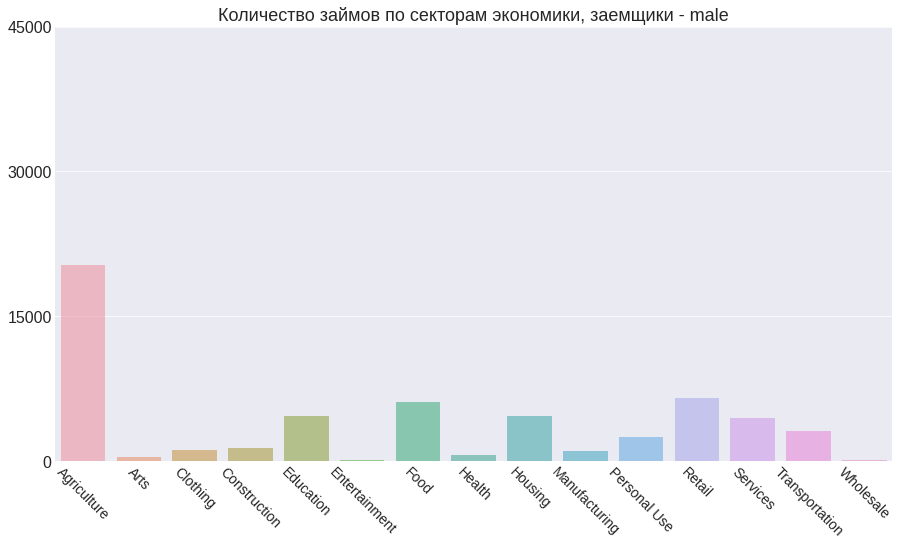

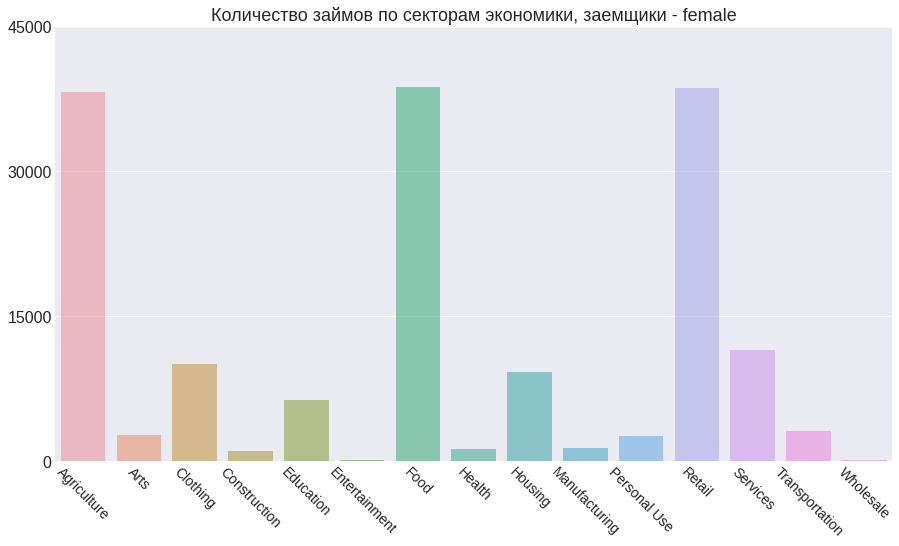

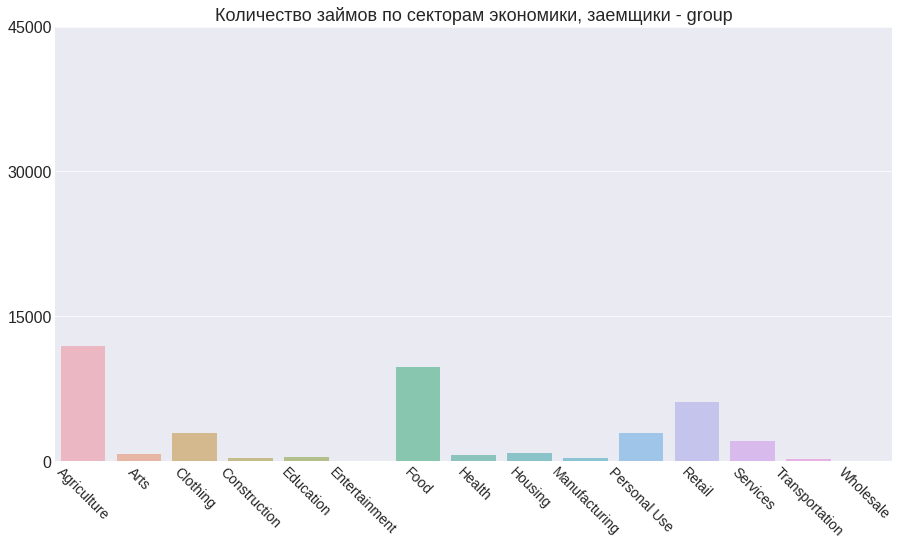

In [36]:
genders = ['male', 'female', 'group']
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)

data_female = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'female']['sector'].value_counts()

for i, gender in enumerate(genders):
    
    plt.figure(figsize=(15,8))
    data = df_kiva_loans[df_kiva_loans['borrower_genders'] == gender]['sector'].value_counts()
    
        
    sns.barplot(x = data.index, y = data.values, order = list_sectors,  alpha=0.6)

    plt.title("Количество займов по секторам экономики, заемщики - " + str(gender), fontsize=18)
    plt.tick_params(axis = 'y', labelsize = 16)
    plt.tick_params(axis = 'x', rotation = - 45, labelsize = 14 )
    plt.yticks(list(range(0, data_female.max() + 10000, 15000)) )
    plt.show();


**Основные выводы: зависимость пола заемщика от сектора экономики**

**Заемщики - мужчины**

1. Их больше всего занимает область сельского хозяйства, которая является фаворитом с огромным отрывом. Это может быть связано со спецификой работы или они выбрали наиболее понятную область, через которую можно обеспечить свою семью необходимым.

2. Три выделяющихся сектора экономики - Ритейл, Еда, Образование
Два первых сектора в целом являются наиболее популярными. Наличие среднего количества заявок в секторе образование должно быть связано с кредитами на образовнаие свое или детей.


**Заемщики - женщины**

1. Сельское хозяйство, еда, ритейл - лидеры.

2. Заявок в секторах экономики Одежда и Искусство больше у девушек. Связано с тем, что темы являются более близкими для женщин.


**Заемщики - группы**

1. Лидеры - сельское хозяйство, еда и займы для персонального использования.

2. Количество займов для персонального использования много именно у групп, должно быть это связано с тем, что займы берут муж и жена, например, или родители и дети, соседи, для того, чтобы обеспечить свою семью чистой водой или санитарным туалетом. 

# 2.3 Количество займов

1. Определить количество займов в разрезе секторов экономики.
2. Определить количество займов в разрезе видов деятельности.
3. Составьть рейтинг из целевых назначений для займа.
4. Проанализируйть наиболее популярные виды деятельности по каждому сектору
экономики
(сгруппировать займы по sector, activity, отобразить группы на отдельных графиках).
5. Исследовать влияние такого атрибута-займа, как «Количество кредиторов (lender_count) на
суммы и сроки займов».

# 2.3.1 Количество займов в разрезе секторов экономики

Количество займов в разрезе секторов экономики:


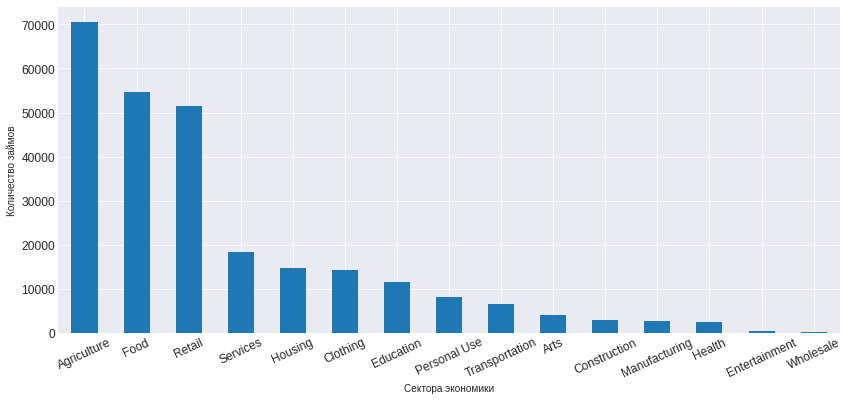

In [37]:
# Группировка данных по секторам с подсчетом записей
group_by_sector = df_kiva_loans.groupby('sector').size().sort_values(ascending=False)
group_by_sector.plot(kind="bar", rot=25, fontsize=12, figsize=(14, 6), xlabel="Сектора экономики", ylabel="Количество займов")
print("Количество займов в разрезе секторов экономики:")

In [38]:
# Количество займов в разных сектарах и их процентное соотношение
print("Количество займов в разных сектарах и их процентное соотношение")
pd.DataFrame({'Количество': group_by_sector, 'Процент': group_by_sector / sum(group_by_sector) * 100})

Количество займов в разных сектарах и их процентное соотношение


,Количество,Процент
sector,,
Agriculture,70527,26.871933
Food,54700,20.841589
Retail,51366,19.571281
Services,18218,6.941354
Housing,14803,5.640183
Clothing,14235,5.423766
Education,11431,4.355397
Personal Use,8019,3.055369
Transportation,6486,2.471271


**Основные выводы**: количество займов в разрезе экономики

1. Как мы видим, большая часть займов 
приходится на агрокультуру - 27%, чуть меньше на еду - 20% и 18% на розничную торговлю. Данные отрасли явные лидеры по количеству займов. В данных секторах экономики очень важна закупка, как правило - это относительно небольшие суммы. Скорее всего, виды деятельности выбились в лидеры из-за низкого порога входа на рынок и соответсвенно большого количества мелких продавцов.

2. Наименьшие займы приходятся на ряд отраслей (производство, оптовые продажи, здоровье, искусство), в которых частно присутсвуют игроки-гиганты и необходимы узкие знания по темам. Так же еще одной причиной может быть непопулярность (возможно низкая необходимость) данных сфер в частях мира, количество займов в которых довольно много. Так в бедных странах Африки и Южной Америки, которое большинство, необходимо перекрыть базовые потребности в еде, воде, предметах первой необходимости, чем заниматься, например, развлечениями.

3. Последнюю теорию доказывают сектора, которые находятся в середине рейтинга (сервис, одежда, образование, жилье).

# 2.3.2 Количество займов в разрезе видов деятельности

Наиболее популярные виды деятельности:


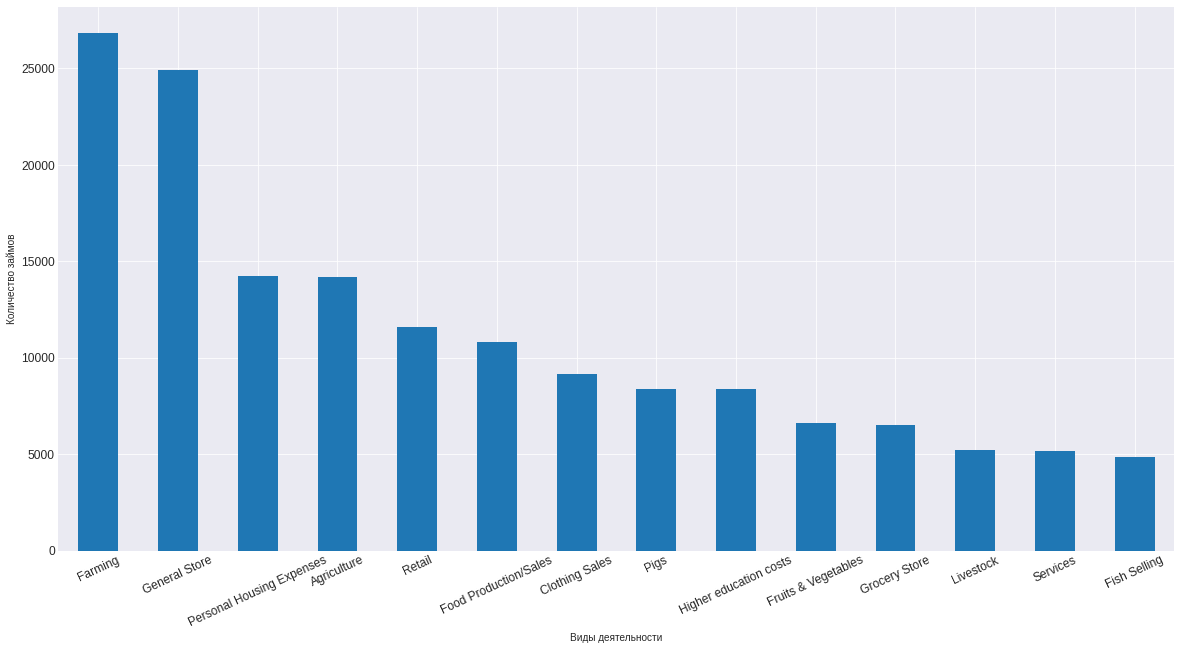

In [39]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_activity = df_kiva_loans.groupby('activity').size().sort_values(ascending=False)

print("Наиболее популярные виды деятельности:")
group_by_activity[:14].plot(kind="bar", rot=25, fontsize=12, figsize=(20, 10), xlabel="Виды деятельности", ylabel="Количество займов")
plt.show()

In [40]:
# Количество займов в разных видах деятельности и их процентное соотношение
print("Количество займов в разных видах деятельности и их процентное соотношение")
pd.DataFrame({'Количество': group_by_activity, 'Процент': group_by_activity / sum(group_by_activity) * 100})

Количество займов в разных видах деятельности и их процентное соотношение


,Количество,Процент
activity,,
Farming,26841,10.226857
General Store,24895,9.485399
Personal Housing Expenses,14215,5.416146
Agriculture,14190,5.406621
Retail,11618,4.426647
...,...,...
Patchwork,6,0.002286
Florist,5,0.001905
Aquaculture,1,0.000381


**Основные выводы** : количество займов в разрезе видов деятельности

1. По полученным данным мы увидели более детально на что люди берут займы. График дает нам понимание, что востребовано у людей и в каких видах деятельности им нужна поддержка.

2. Два явных лидера - **Фермерство** и **Универсамы**. Так как большинтсво заемщиков находится в бедных странах, они пытаются закрыть высокий спрос на "самое нужное". Так же вероятно, что фермерство является абсолютным лидером из-за моды на здоровое питание в развитых странах.

3. Дальнейшие виды деятельности - это то, с чем человек сталкивается в развивющейся/развитой стране довольно частно.

4. Инстересно, что люди занимаются свиноводством, хотя казалось, что большое количество заемщиков исповедуют Ислам, должно быть это связано с тем, что огрномное количество людей любят бекон.

5. Сюда по категориям одни люди очень любят есть, вторые (много мелких предпринимателей) знают, где достать подешевле и продать.

# 2.3.3 Составьте рейтинг из целевых назначений для займа.

In [41]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_use = df_kiva_loans.groupby('use').size().sort_values(ascending=False)

print("Наиболее популярные назначения займа (топ-20):")
for i in group_by_use[:20].items():
  print(f'{i[0]}: {i[1]} человек')

Наиболее популярные назначения займа (топ-20):
to purchase more groceries to sell.: 941 человек
to buy feed and vitamins for her pigs.: 755 человек
To buy a water filter to provide safe drinking water for their family.: 607 человек
to buy feed and vitamins for her pigs: 602 человек
to purchase building materials and pay for construction labor: 583 человек
To access high-quality inputs such as fertilizer and seed in order to double income and yield.: 572 человек
to buy ingredients for her food production business: 569 человек
to buy fertilizers and other farm supplies.: 451 человек
to purchase building materials and pay for construction labor.: 432 человек
to buy ingredients for her food production business.: 332 человек
to buy fertilizers and other farm supplies: 332 человек
to buy more fish to sell.: 313 человек
to buy feeds and vitamins for her pigs.: 304 человек
to buy feeds and vitamins for her pigs: 299 человек
to purchase a solar light and gain access to cost efficient hybrid see

1. Наиболее популярная причина для взятия займа - покупка фильтра для обеспечения питьевой водой. Это говорит о том, что больше всего программа популярна в бедных странах, среди людей, которые не живут, а пытаются выжить. Kiva - должно быть их единственная опора, возможность сделать жизнь лучше.
Этот факт показывает, что Kiva в первую очередь про идею, а не про деньги.

2. Интересно, что люди охотнее выбирают заемщиков в сферах, которые закрывают нужды, а не занимаются предпринемательством. Это значит, что более богатые люди действительно озабочены уровнем жизни остальных и готовы его повышать.

3. Также людей заботит экология to buy a solar lantern : 881 человек to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation.

# 2.3.4. Влияние такого атрибута займа, как «Количество кредиторов (lender_count) на суммы и сроки займов».

In [42]:
dependence_lender_count = df_kiva_loans[['lender_count', 'funded_amount', 'term_in_months']].sort_values(by='lender_count')

# Сргуппируем данные по количеству кредиторов со взятием среднего значения
dependence_lender_count = dependence_lender_count.groupby('lender_count').mean()

dependence_lender_count

,funded_amount,term_in_months
lender_count,,
0.0,0.000000,21.011834
1.0,499.339923,10.057296
2.0,661.194030,10.074382
3.0,334.135426,10.763229
4.0,277.580006,11.084263
...,...,...
1446.0,50000.000000,14.000000
1491.0,50000.000000,16.000000
1581.0,50000.000000,14.000000


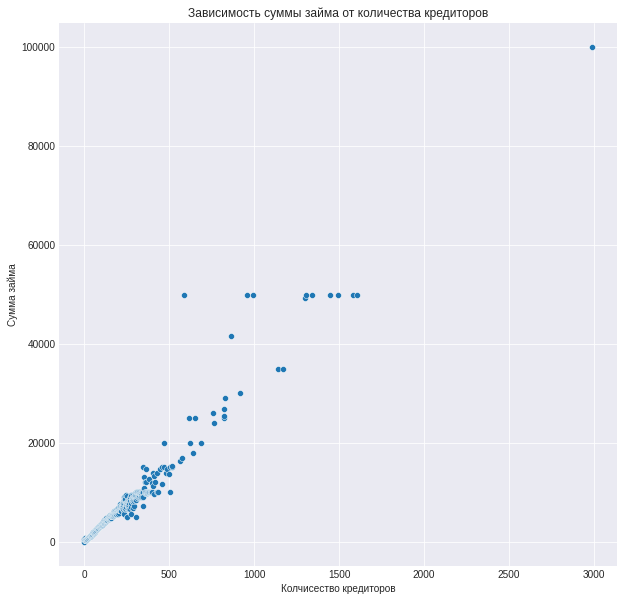

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='funded_amount', ax=ax, alpha=1)
ax.set_title('Зависимость суммы займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Сумма займа')

plt.show()

**Зависимость суммы займа от количества кредиторов**

1. Чем больше количество кредиторов, тем больше сумма займа. Это значит, зачастую на один большой кредит деньги дает несколько кредиторов. Много людей готовы давать взаймы, но делают это небольшими суммами (примерно 500 долларов).

2. Непонятно с чем связаны такие скачки в точках при количестве кредиторов от ~600 до ~1300.

3. Прослеживается ряд точек в значениях суммы займа ~5000. Причины неизвестны.

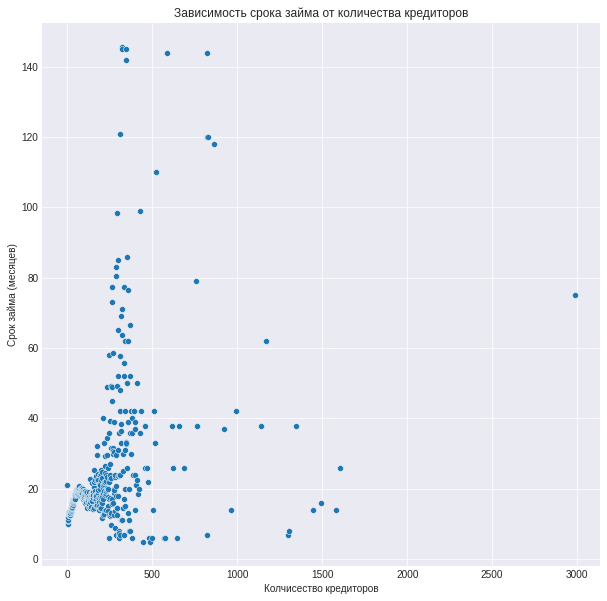

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='term_in_months', ax=ax, alpha=1)
ax.set_title('Зависимость срока займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Срок займа (месяцев)')

plt.show()

**Зависимость срока займа от количества кредиторов**

1. Количество кредиторов не влияет на срок займа.

2. Видно, что есть около 400 кредиторов, которые готовы выдавать займы на любой срок в интервале от 0 до 120.